## Task 1 - Understanding the data
- What kind of dataset is this? Provide some context by saying a little about what kind of
objects we are talking about;
- Compute and interpret summary statistics;
- Highlight scale differences and identify potential outliers or anomalies (if Any).
- Plot each variable and do a Visual exploration (for example you can identify and describe
any possible Long-term trends, Seasonal cycles (daily, weekly, yearly), Short-term
fluctuations or anomalies, etc.

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [170]:
data_path = "PGR304 final_selected_load_predictors.csv"
df = pd.read_csv(data_path)
df.head(10)

,timestamp,load_MW,temp_C,price_DA_EUR_MWh,solar_MW,clouds_pct
0,2014-12-31 23:00:00+00:00,25385.0,-2.675,50.10,49.0,0
1,2015-01-01 00:00:00+00:00,24382.0,-2.675,48.10,50.0,0
2,2015-01-01 01:00:00+00:00,22734.0,-3.464,47.33,50.0,0
3,2015-01-01 02:00:00+00:00,21286.0,-3.464,42.27,50.0,0
4,2015-01-01 03:00:00+00:00,20264.0,-3.464,38.41,42.0,0
5,2015-01-01 04:00:00+00:00,19905.0,-2.858,35.72,34.0,0
6,2015-01-01 05:00:00+00:00,20010.0,-2.858,35.13,34.0,0
7,2015-01-01 06:00:00+00:00,20377.0,-2.858,36.22,35.0,0
8,2015-01-01 07:00:00+00:00,20094.0,1.451,32.40,54.0,0
9,2015-01-01 08:00:00+00:00,20637.0,1.451,36.60,743.0,0


Inspect the dataset and some statistics

In [171]:
def describe_data(dataframe):
    print("Dataframe Shape:", dataframe.shape)
    print("Dataframe Info:")
    dataframe.info()
    print("\nStatistical Summary:")
    print(dataframe.describe())
    print("\nMissing Values:")
    print(dataframe.isnull().sum())
describe_data(df)

Dataframe Shape: (35064, 6)
Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   timestamp         35064 non-null  object 
 1   load_MW           35028 non-null  float64
 2   temp_C            35064 non-null  float64
 3   price_DA_EUR_MWh  35064 non-null  float64
 4   solar_MW          35046 non-null  float64
 5   clouds_pct        35064 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.6+ MB

Statistical Summary:
            load_MW        temp_C  price_DA_EUR_MWh      solar_MW  \
count  35028.000000  35064.000000      35064.000000  35046.000000   
mean   28696.939905     17.633954         49.874341   1432.665925   
std     4574.987950      7.234569         14.618900   1680.119887   
min    18041.000000     -4.319344          2.060000      0.000000   
25%    24807.750000     12.000000         4

Handlig timestap column

In [172]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df = df.set_index('timestamp')

print("Time span:", df.index.min(), "to", df.index.max())

Time span: 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00


Handling missing values

In [173]:
df["load_MW"] = df["load_MW"].ffill().bfill()
df["solar_MW"] = df["solar_MW"].ffill().bfill()

### Interpretation of summary statistics

The dataset contains **35064** rows and **5** columns. For the main numerical variables we observe:
- **load_MW** ranges roughly from 18041.00 to 41015.00 with a mean around 28696.94 and standard deviation 4574.99.
- **temp_C** ranges roughly from -4.32 to 38.00 with a mean around 17.63 and standard deviation 7.23.
- **price_DA_EUR_MWh** ranges roughly from 2.06 to 101.99 with a mean around 49.87 and standard deviation 14.62.
- **solar_MW** ranges roughly from 0.00 to 5792.00 with a mean around 1432.67 and standard deviation 1680.12.
- **clouds_pct** ranges roughly from 0.00 to 100.00 with a mean around 20.74 and standard deviation 25.60.

In [174]:
numeric_cols = ["load_MW", "temp_C", "price_DA_EUR_MWh", "solar_MW", "clouds_pct"]
numeric_cols = [c for c in numeric_cols if c in df.columns]

summary_stats = df[numeric_cols].describe().T

# z-score calculation based outlier detection
z = (df[numeric_cols] - summary_stats['mean']) / summary_stats['std']
outliers = (z.abs() > 4).sum()
print("Potential outliers detected (z-score > 4):")
print(outliers)

Potential outliers detected (z-score > 4):
load_MW             0
temp_C              0
price_DA_EUR_MWh    0
solar_MW            0
clouds_pct          0
dtype: int64


In [175]:
df.head()

,load_MW,temp_C,price_DA_EUR_MWh,solar_MW,clouds_pct
timestamp,,,,,
2014-12-31 23:00:00+00:00,25385.0,-2.675,50.10,49.0,0
2015-01-01 00:00:00+00:00,24382.0,-2.675,48.10,50.0,0
2015-01-01 01:00:00+00:00,22734.0,-3.464,47.33,50.0,0
2015-01-01 02:00:00+00:00,21286.0,-3.464,42.27,50.0,0
2015-01-01 03:00:00+00:00,20264.0,-3.464,38.41,42.0,0


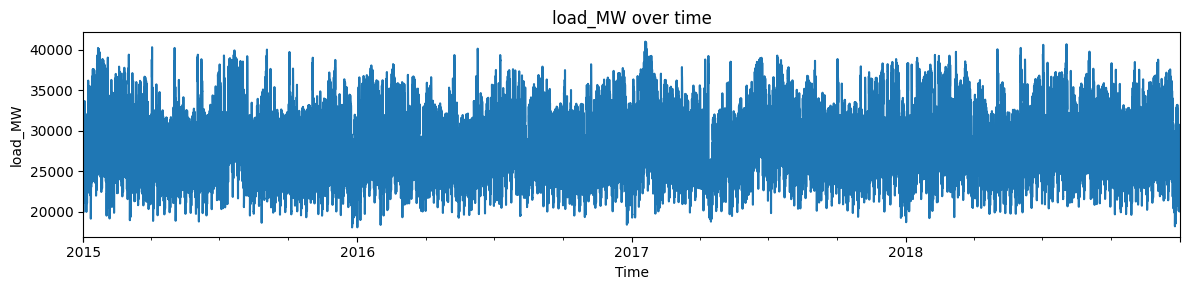

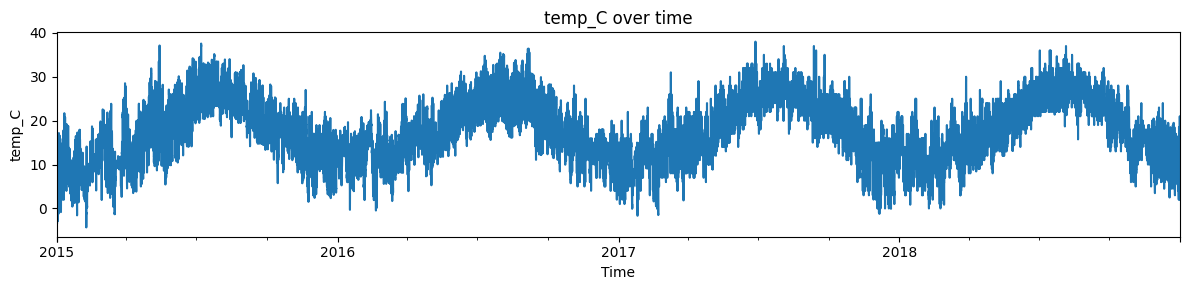

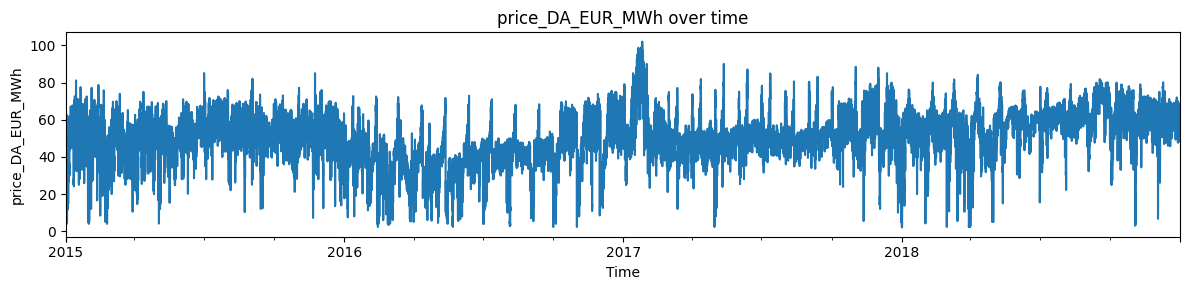

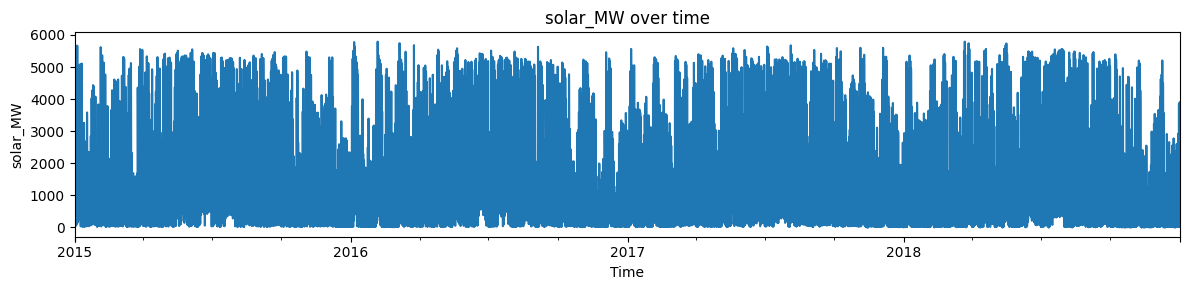

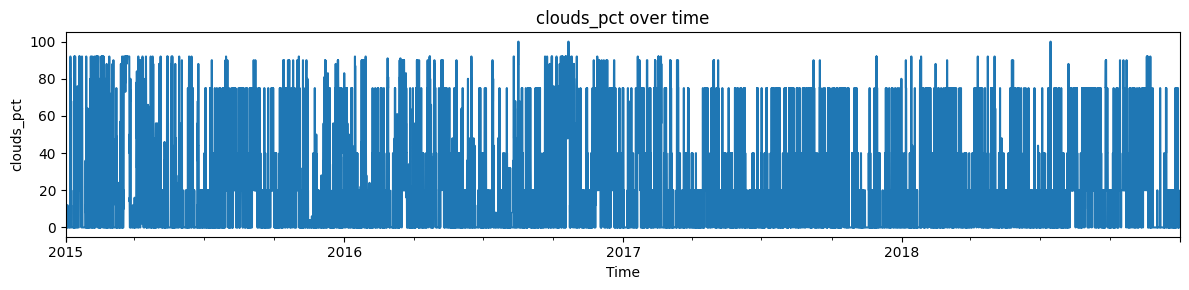

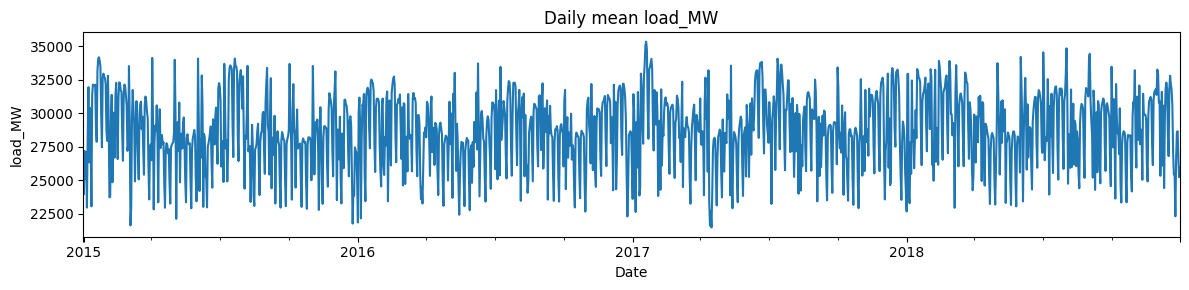

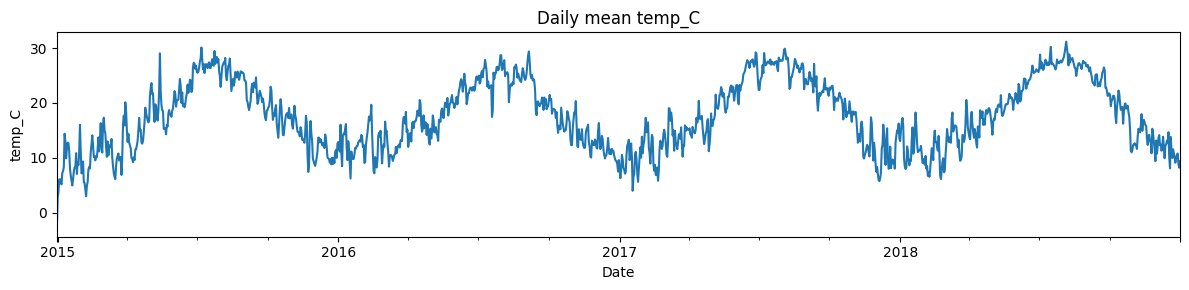

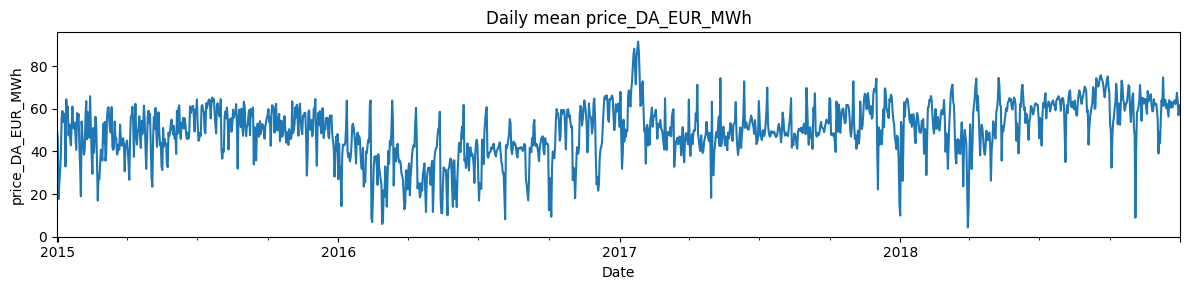

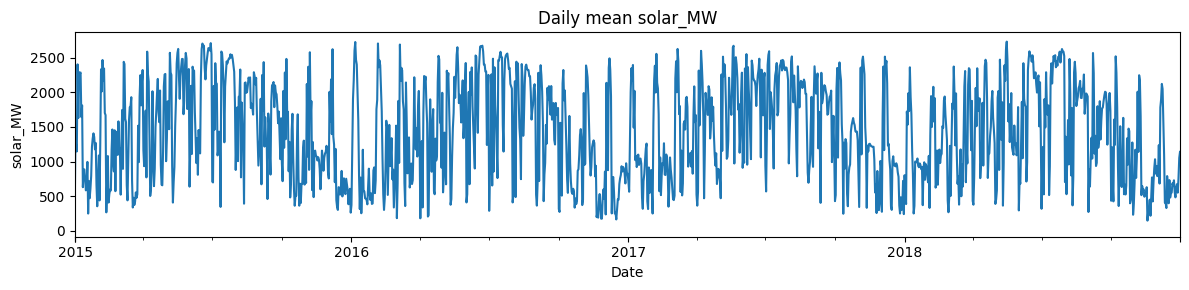

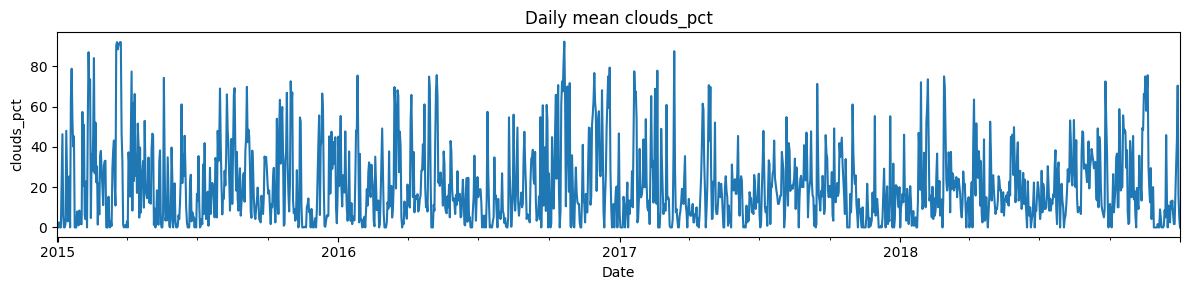

In [176]:
for col in numeric_cols:
    df[col].plot(figsize=(12, 3))
    plt.title(f"{col} over time")
    plt.xlabel("Time")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

daily = df[numeric_cols].resample("D").mean()
for col in numeric_cols:
    daily[col].plot(figsize=(12, 3))
    plt.title(f"Daily mean {col}")
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

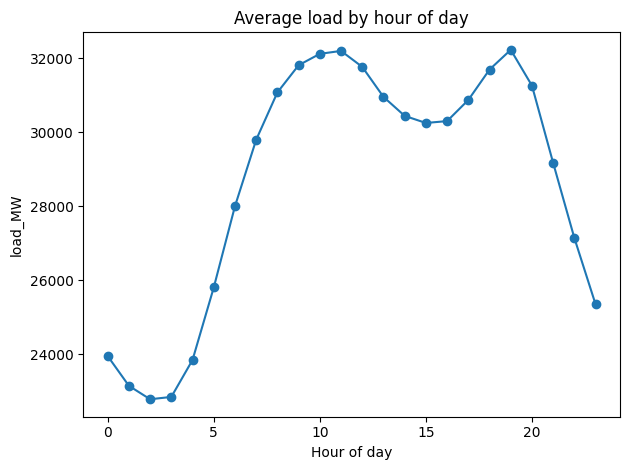

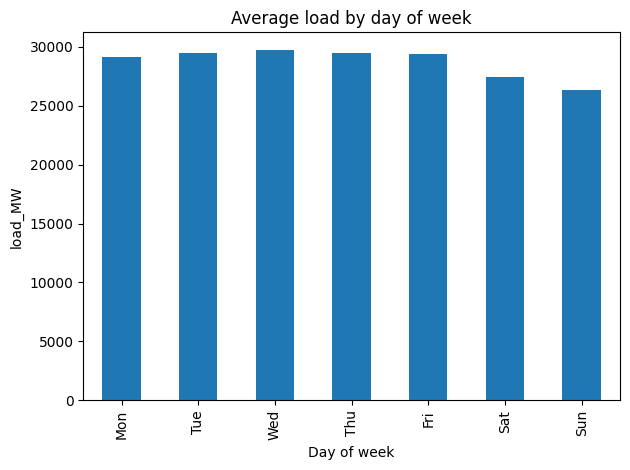

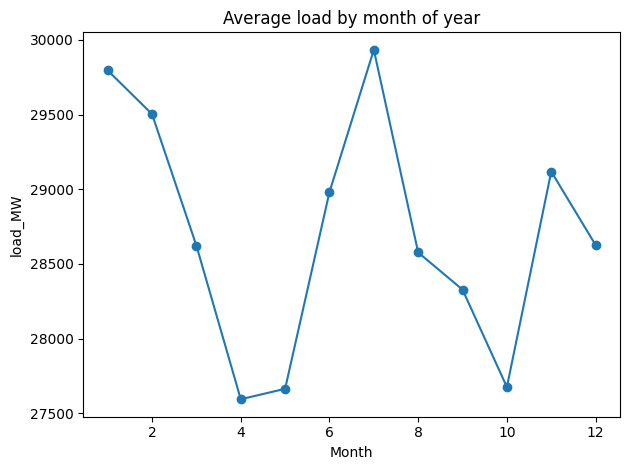

In [177]:
# Seasonal patterns: hour of day, day of week, month of year (if we have a DateTimeIndex)
# Hour-of-day profile
hour_profile = df["load_MW"].groupby(df.index.hour).mean()
hour_profile.plot(kind="line", marker="o")
plt.title("Average load by hour of day")
plt.xlabel("Hour of day")
plt.ylabel("load_MW")
plt.tight_layout()
plt.show()

# Day-of-week profile
dow_profile = df["load_MW"].groupby(df.index.dayofweek).mean()
dow_profile.index = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
dow_profile.plot(kind="bar")
plt.title("Average load by day of week")
plt.xlabel("Day of week")
plt.ylabel("load_MW")
plt.tight_layout()
plt.show()

# Month-of-year profile
moy_profile = df["load_MW"].groupby(df.index.month).mean()
moy_profile.plot(kind="line", marker="o")
plt.title("Average load by month of year")
plt.xlabel("Month")
plt.ylabel("load_MW")
plt.tight_layout()
plt.show()


## Task 2 Utility value.

In [178]:
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.stattools import ccf
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests

In [179]:
corr = df[numeric_cols].corr()
corr

,load_MW,temp_C,price_DA_EUR_MWh,solar_MW,clouds_pct
load_MW,1.000000,0.221031,0.474102,0.395609,0.040384
temp_C,0.221031,1.000000,0.090572,0.456559,-0.028432
price_DA_EUR_MWh,0.474102,0.090572,1.000000,0.058049,0.054474
solar_MW,0.395609,0.456559,0.058049,1.000000,-0.011375
clouds_pct,0.040384,-0.028432,0.054474,-0.011375,1.000000


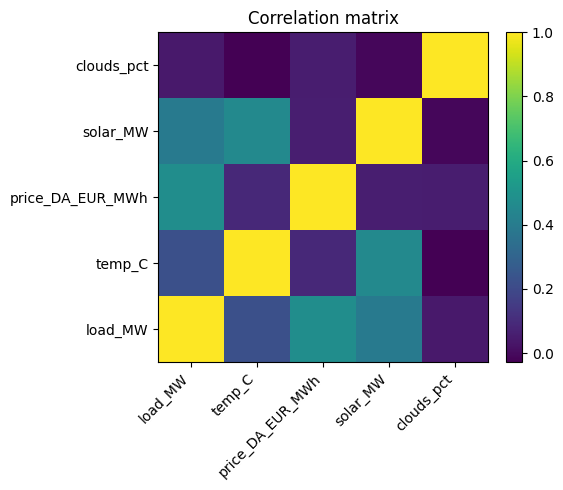

In [180]:
# Visualize correlations with a simple heatmap (matplotlib only)
fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(corr.values, origin="lower")

# Show all ticks and label them with the column names
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.index)))
ax.set_xticklabels(corr.columns, rotation=45, ha="right")
ax.set_yticklabels(corr.index)

# Add colorbar
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
ax.set_title("Correlation matrix")

plt.tight_layout()
plt.show()

In [181]:
sub = df[numeric_cols].dropna().copy()
print("Subset shape for Granger / VAR:", sub.shape)

sub2 = sub.loc["2017-01-01 ":"2017-12-31"]
print("Subset shape for Granger / VAR (2017):", sub2.shape)

Subset shape for Granger / VAR: (35064, 5)
Subset shape for Granger / VAR (2017): (8760, 5)


In [182]:
# Example: does temp_C Granger-cause load_MW?
if "load_MW" in sub.columns and "temp_C" in sub.columns:
    print("\nGranger causality test: temp_C -> load_MW")
    # maxlag can be reduced if this is too slow (e.g. 12)
    granger_result = grangercausalitytests(
        sub[["load_MW", "temp_C"]].dropna(), maxlag=24, verbose=True
    )


Granger causality test: temp_C -> load_MW

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=156.5096, p=0.0000  , df_denom=35060, df_num=1
ssr based chi2 test:   chi2=156.5230, p=0.0000  , df=1
likelihood ratio test: chi2=156.1746, p=0.0000  , df=1
parameter F test:         F=156.5096, p=0.0000  , df_denom=35060, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=55.8087 , p=0.0000  , df_denom=35057, df_num=2
ssr based chi2 test:   chi2=111.6332, p=0.0000  , df=2
likelihood ratio test: chi2=111.4559, p=0.0000  , df=2
parameter F test:         F=55.8087 , p=0.0000  , df_denom=35057, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=112.1750, p=0.0000  , df_denom=35054, df_num=3
ssr based chi2 test:   chi2=336.5922, p=0.0000  , df=3
likelihood ratio test: chi2=334.9868, p=0.0000  , df=3
parameter F test:         F=112.1750, p=0.0000  , df_denom=35054, df_num=3

Granger Causality
number of lags (no z

c:\pa exam\.venv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=231.3321, p=0.0000  , df_denom=35045, df_num=6
ssr based chi2 test:   chi2=1388.5073, p=0.0000  , df=6
likelihood ratio test: chi2=1361.7158, p=0.0000  , df=6
parameter F test:         F=231.3321, p=0.0000  , df_denom=35045, df_num=6

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=296.6286, p=0.0000  , df_denom=35042, df_num=7
ssr based chi2 test:   chi2=2077.2888, p=0.0000  , df=7
likelihood ratio test: chi2=2018.0724, p=0.0000  , df=7
parameter F test:         F=296.6286, p=0.0000  , df_denom=35042, df_num=7

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=354.1687, p=0.0000  , df_denom=35039, df_num=8
ssr based chi2 test:   chi2=2834.7241, p=0.0000  , df=8
likelihood ratio test: chi2=2725.9388, p=0.0000  , df=8
parameter F test:         F=354.1687, p=0.0000  , df_denom=35039, df_num=8

Granger Causality
number of lags (no zero) 9
ssr based F test:         F=320.5567, p=0.0000  , df_denom=35036, df_num=9
s

In [183]:
# Example: does price_DA_EUR_MWh Granger-cause load_MW?
if "load_MW" in sub.columns and "price_DA_EUR_MWh" in sub.columns:
    print("\nGranger causality test: price_DA_EUR_MWh -> load_MW")
    granger_result_price = grangercausalitytests(
        sub[["load_MW", "price_DA_EUR_MWh"]].dropna(), maxlag=24, verbose=True
    )


Granger causality test: price_DA_EUR_MWh -> load_MW

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=33.2570 , p=0.0000  , df_denom=35060, df_num=1
ssr based chi2 test:   chi2=33.2598 , p=0.0000  , df=1
likelihood ratio test: chi2=33.2441 , p=0.0000  , df=1
parameter F test:         F=33.2570 , p=0.0000  , df_denom=35060, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=433.1069, p=0.0000  , df_denom=35057, df_num=2
ssr based chi2 test:   chi2=866.3372, p=0.0000  , df=2
likelihood ratio test: chi2=855.8073, p=0.0000  , df=2
parameter F test:         F=433.1069, p=0.0000  , df_denom=35057, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=280.2992, p=0.0000  , df_denom=35054, df_num=3
ssr based chi2 test:   chi2=841.0655, p=0.0000  , df=3
likelihood ratio test: chi2=831.1359, p=0.0000  , df=3
parameter F test:         F=280.2992, p=0.0000  , df_denom=35054, df_num=3

Granger Causality
number of 

c:\pa exam\.venv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=277.0877, p=0.0000  , df_denom=35048, df_num=5
ssr based chi2 test:   chi2=1385.8736, p=0.0000  , df=5
likelihood ratio test: chi2=1359.1830, p=0.0000  , df=5
parameter F test:         F=277.0877, p=0.0000  , df_denom=35048, df_num=5

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=306.0379, p=0.0000  , df_denom=35045, df_num=6
ssr based chi2 test:   chi2=1836.9087, p=0.0000  , df=6
likelihood ratio test: chi2=1790.4027, p=0.0000  , df=6
parameter F test:         F=306.0379, p=0.0000  , df_denom=35045, df_num=6

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=276.3268, p=0.0000  , df_denom=35042, df_num=7
ssr based chi2 test:   chi2=1935.1155, p=0.0000  , df=7
likelihood ratio test: chi2=1883.5947, p=0.0000  , df=7
parameter F test:         F=276.3268, p=0.0000  , df_denom=35042, df_num=7

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=252.1239, p=0.0000  , df_denom=35039, df_num=8
s

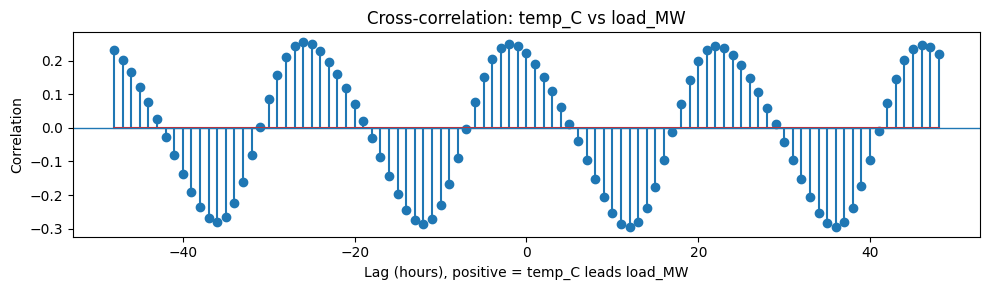

In [184]:
# Align and standardize
x = (sub["temp_C"] - sub["temp_C"].mean()) / sub["temp_C"].std()
y = (sub["load_MW"] - sub["load_MW"].mean()) / sub["load_MW"].std()

max_lag = 48  # up to two days of lags
lags = range(-max_lag, max_lag + 1)
ccor = []

# Manually compute cross-correlation at each lag
for k in lags:
    if k < 0:
        c = np.corrcoef(x[-k:], y[:k])[0, 1]
    elif k > 0:
        c = np.corrcoef(x[:-k], y[k:])[0, 1]
    else:
        c = np.corrcoef(x, y)[0, 1]
    ccor.append(c)

plt.figure(figsize=(10, 3))
plt.stem(lags, ccor)
plt.axhline(0, linewidth=1)
plt.title("Cross-correlation: temp_C vs load_MW")
plt.xlabel("Lag (hours), positive = temp_C leads load_MW")
plt.ylabel("Correlation")
plt.tight_layout()
plt.show()

In [185]:
# Check time-step regularity if we have a DateTimeIndex
diffs = df.index.to_series().diff().dropna()
print("\nMost common time step:", diffs.mode().iloc[0])
print("Unique time steps:", diffs.unique()[:5])


Most common time step: 0 days 01:00:00
Unique time steps: <TimedeltaArray>
['0 days 01:00:00']
Length: 1, dtype: timedelta64[ns]


In [186]:
def adf_test(series, name="series"):
    result = adfuller(series.dropna(), autolag="AIC")
    print(f"ADF test for {name}")
    print(f"  Test statistic: {result[0]:.4f}")
    print(f"  p-value:        {result[1]:.4f}")
    print("  => Reject H0 (unit root) at 5%?" , result[1] < 0.05)
    print()

def kpss_test(series, name="series"):
    try:
        result = kpss(series.dropna(), regression="c", nlags="auto")
        print(f"KPSS test for {name}")
        print(f"  Test statistic: {result[0]:.4f}")
        print(f"  p-value:        {result[1]:.4f}")
        print("  => Reject H0 (stationary) at 5%?" , result[1] < 0.05)
        print()
    except Exception as e:
        print(f"KPSS failed for {name}: {e}\n")

# Run tests on original series
for col in numeric_cols:
    print("===" * 15)
    adf_test(df[col], name=col)
    kpss_test(df[col], name=col)

ADF test for load_MW
  Test statistic: -21.4416
  p-value:        0.0000
  => Reject H0 (unit root) at 5%? True

KPSS test for load_MW
  Test statistic: 0.8743
  p-value:        0.0100
  => Reject H0 (stationary) at 5%? True



C:\Users\tom_t\AppData\Local\Temp\ipykernel_30588\453495090.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series.dropna(), regression="c", nlags="auto")


ADF test for temp_C
  Test statistic: -5.5485
  p-value:        0.0000
  => Reject H0 (unit root) at 5%? True

KPSS test for temp_C
  Test statistic: 1.1249
  p-value:        0.0100
  => Reject H0 (stationary) at 5%? True



C:\Users\tom_t\AppData\Local\Temp\ipykernel_30588\453495090.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series.dropna(), regression="c", nlags="auto")


ADF test for price_DA_EUR_MWh
  Test statistic: -12.2886
  p-value:        0.0000
  => Reject H0 (unit root) at 5%? True

KPSS test for price_DA_EUR_MWh
  Test statistic: 6.9402
  p-value:        0.0100
  => Reject H0 (stationary) at 5%? True



C:\Users\tom_t\AppData\Local\Temp\ipykernel_30588\453495090.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series.dropna(), regression="c", nlags="auto")


ADF test for solar_MW
  Test statistic: -13.8892
  p-value:        0.0000
  => Reject H0 (unit root) at 5%? True

KPSS test for solar_MW
  Test statistic: 0.8651
  p-value:        0.0100
  => Reject H0 (stationary) at 5%? True



C:\Users\tom_t\AppData\Local\Temp\ipykernel_30588\453495090.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series.dropna(), regression="c", nlags="auto")


ADF test for clouds_pct
  Test statistic: -17.8195
  p-value:        0.0000
  => Reject H0 (unit root) at 5%? True

KPSS test for clouds_pct
  Test statistic: 0.3121
  p-value:        0.1000
  => Reject H0 (stationary) at 5%? False



C:\Users\tom_t\AppData\Local\Temp\ipykernel_30588\453495090.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series.dropna(), regression="c", nlags="auto")


In [187]:
# Run tests on first differences
for col in numeric_cols:
    print("===" * 15)
    adf_test(df[col].diff(), name=f"{col} (1st diff)")
    kpss_test(df[col].diff(), name=f"{col} (1st diff)")

ADF test for load_MW (1st diff)
  Test statistic: -34.2819
  p-value:        0.0000
  => Reject H0 (unit root) at 5%? True



C:\Users\tom_t\AppData\Local\Temp\ipykernel_30588\453495090.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series.dropna(), regression="c", nlags="auto")


KPSS test for load_MW (1st diff)
  Test statistic: 0.0545
  p-value:        0.1000
  => Reject H0 (stationary) at 5%? False

ADF test for temp_C (1st diff)
  Test statistic: -32.8642
  p-value:        0.0000
  => Reject H0 (unit root) at 5%? True

KPSS test for temp_C (1st diff)
  Test statistic: 0.0951
  p-value:        0.1000
  => Reject H0 (stationary) at 5%? False



C:\Users\tom_t\AppData\Local\Temp\ipykernel_30588\453495090.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series.dropna(), regression="c", nlags="auto")


ADF test for price_DA_EUR_MWh (1st diff)
  Test statistic: -32.3172
  p-value:        0.0000
  => Reject H0 (unit root) at 5%? True

KPSS test for price_DA_EUR_MWh (1st diff)
  Test statistic: 0.0143
  p-value:        0.1000
  => Reject H0 (stationary) at 5%? False



C:\Users\tom_t\AppData\Local\Temp\ipykernel_30588\453495090.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series.dropna(), regression="c", nlags="auto")


ADF test for solar_MW (1st diff)
  Test statistic: -35.2908
  p-value:        0.0000
  => Reject H0 (unit root) at 5%? True

KPSS test for solar_MW (1st diff)
  Test statistic: 0.0052
  p-value:        0.1000
  => Reject H0 (stationary) at 5%? False



C:\Users\tom_t\AppData\Local\Temp\ipykernel_30588\453495090.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series.dropna(), regression="c", nlags="auto")


ADF test for clouds_pct (1st diff)
  Test statistic: -38.6639
  p-value:        0.0000
  => Reject H0 (unit root) at 5%? True

KPSS test for clouds_pct (1st diff)
  Test statistic: 0.0052
  p-value:        0.1000
  => Reject H0 (stationary) at 5%? False



C:\Users\tom_t\AppData\Local\Temp\ipykernel_30588\453495090.py:11: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series.dropna(), regression="c", nlags="auto")


Task 3 Analysis, modeling and prediction.

In [188]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [189]:
# Train-test split: last 48 observations as test
horizon = 48
train = df.iloc[:-horizon].copy()
test = df.iloc[-horizon:].copy()

print("\nTrain shape:", train.shape)
print("Test shape:", test.shape)
print("Train span:", train.index.min(), "->", train.index.max())
print("Test span:", test.index.min(), "->", test.index.max())


Train shape: (35016, 5)
Test shape: (48, 5)
Train span: 2014-12-31 23:00:00+00:00 -> 2018-12-29 22:00:00+00:00
Test span: 2018-12-29 23:00:00+00:00 -> 2018-12-31 22:00:00+00:00


In [190]:
df_diff = df.diff().dropna()

# Align differenced data to training window
train_diff = df_diff.loc[train.index.intersection(df_diff.index)].copy()

print("Differenced training shape:", train_diff.shape)
train_diff.head()

Differenced training shape: (35015, 5)


,load_MW,temp_C,price_DA_EUR_MWh,solar_MW,clouds_pct
timestamp,,,,,
2015-01-01 00:00:00+00:00,-1003.0,0.000,-2.00,1.0,0.0
2015-01-01 01:00:00+00:00,-1648.0,-0.789,-0.77,0.0,0.0
2015-01-01 02:00:00+00:00,-1448.0,0.000,-5.06,0.0,0.0
2015-01-01 03:00:00+00:00,-1022.0,0.000,-3.86,-8.0,0.0
2015-01-01 04:00:00+00:00,-359.0,0.606,-2.69,-8.0,0.0


In [191]:
# Select lag order (limit maxlags to keep runtime reasonable)
maxlags = 48  # up to two days of hourly lags
model_var = VAR(train_diff)

lag_order_results = model_var.select_order(maxlags=maxlags)
print(lag_order_results.summary())

# Choose lag order based on AIC (you may switch to BIC if you prefer more parsimony)
opt_lag = lag_order_results.selected_orders["aic"]
print("\nSelected lag order by AIC:", opt_lag)

# Fit final VAR model
var_model = model_var.fit(opt_lag)
print(var_model.summary())

c:\pa exam\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        34.70       34.71   1.180e+15       34.70
1        32.73       32.74   1.646e+14       32.74
2        32.41       32.42   1.189e+14       32.41
3        32.31       32.33   1.079e+14       32.32
4        32.23       32.25   9.895e+13       32.23
5        32.11       32.14   8.795e+13       32.12
6        32.01       32.05   7.971e+13       32.02
7        31.92       31.96   7.295e+13       31.93
8        31.86       31.91   6.878e+13       31.88
9        31.80       31.86   6.482e+13       31.82
10       31.72       31.78   5.950e+13       31.74
11       31.67       31.74   5.667e+13       31.69
12       31.56       31.64   5.106e+13       31.59
13       31.51       31.59   4.859e+13       31.54
14       31.48       31.57   4.715e+13       31.51
15       31.44       31.53   4.507e+13       31.47
16       31.40       31.50   4.

VAR forecast performance on 48-hour test set:
  MAE  = 1590.872 MW
  RMSE = 1875.302 MW
  MAPE = 6.48 %


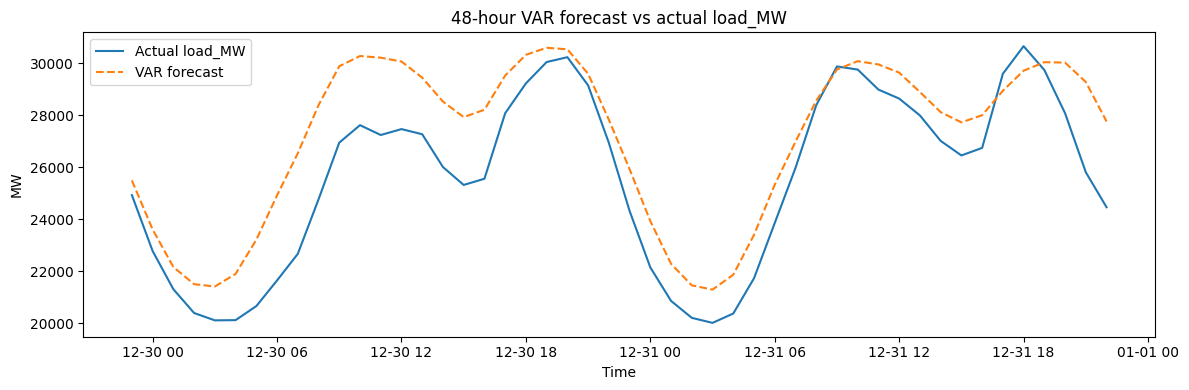

In [192]:
# Number of steps to forecast = length of test set
steps = len(test)

# Last 'opt_lag' differenced observations as initial values
history = train_diff.values[-opt_lag:]

# Forecast future differences
var_forecast_diff = var_model.forecast(history, steps=steps)
var_forecast_diff = pd.DataFrame(var_forecast_diff, 
                                 index=test.index, 
                                 columns=train_diff.columns)

# Back-transform to levels for load_MW
last_load_train = train["load_MW"].iloc[-1]
load_diff_forecast = var_forecast_diff["load_MW"]
load_forecast_var = last_load_train + load_diff_forecast.cumsum()

# Evaluation against test data
y_true = test["load_MW"]
y_pred_var = load_forecast_var

mae_var = (y_true - y_pred_var).abs().mean()
rmse_var = np.sqrt(((y_true - y_pred_var) ** 2).mean())
mape_var = ((y_true - y_pred_var).abs() / y_true.abs()).mean() * 100

print("VAR forecast performance on 48-hour test set:")
print(f"  MAE  = {mae_var:.3f} MW")
print(f"  RMSE = {rmse_var:.3f} MW")
print(f"  MAPE = {mape_var:.2f} %")

# Plot actual vs forecast
plt.figure(figsize=(12, 4))
plt.plot(y_true.index, y_true, label="Actual load_MW")
plt.plot(y_pred_var.index, y_pred_var, label="VAR forecast", linestyle="--")
plt.title("48-hour VAR forecast vs actual load_MW")
plt.xlabel("Time")
plt.ylabel("MW")
plt.legend()
plt.tight_layout()
plt.show()

Bouns task

In [ ]:
sarima_train = train.loc["2017-01-01":].copy()

y_train = sarima_train["load_MW"]
y_test = test["load_MW"]

# Sørg for at serien har eksplisitt time-frekvens (H), dette fjerner også warningen
y_train = y_train.asfreq("H")
y_test = y_test.asfreq("H")

print("SARIMA train span:", y_train.index.min(), "->", y_train.index.max())
print("SARIMA test span: ", y_test.index.min(), "->", y_test.index.max())

# Litt mindre og snillere grid med kandidater
candidate_orders = [(1, 1, 1), (2, 1, 1)]
candidate_seasonals = [(0, 1, 1, 24)]  # daglig sesong (24 timer)

best_aic = np.inf
best_order = None
best_seasonal = None
best_model = None

for order in candidate_orders:
    for seasonal_order in candidate_seasonals:
        try:
            print(f"Fitting SARIMA order={order}, seasonal={seasonal_order}...")
            model = SARIMAX(
                y_train,
                order=order,
                seasonal_order=seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False,
            )
            result = model.fit(disp=False)
            print(f"  => AIC={result.aic:.2f}")
            if result.aic < best_aic:
                best_aic = result.aic
                best_order = order
                best_seasonal = seasonal_order
                best_model = result
        except Exception as e:
            print(f"Failed for order={order}, seasonal={seasonal_order}: {e}")

print("\nBest SARIMA model:")
print("  order    =", best_order)
print("  seasonal =", best_seasonal)
print("  best AIC =", best_aic)

c:\pa exam\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\pa exam\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


Tested order=(1, 1, 1), seasonal=(0, 1, 1, 24), AIC=558381.20


c:\pa exam\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\pa exam\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


Tested order=(1, 1, 1), seasonal=(1, 1, 1, 24), AIC=556950.92


c:\pa exam\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\pa exam\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


KeyboardInterrupt: 

In [ ]:
# Forecast 48 hours ahead
steps = len(y_test)
sarima_forecast = best_model.get_forecast(steps=steps)
y_pred_sarima = sarima_forecast.predicted_mean
y_pred_sarima.index = y_test.index  # align index with test

mae_sarima = (y_test - y_pred_sarima).abs().mean()
rmse_sarima = np.sqrt(((y_test - y_pred_sarima) ** 2).mean())
mape_sarima = ((y_test - y_pred_sarima).abs() / y_test.abs()).mean() * 100

print("SARIMA forecast performance on 48-hour test set:")
print(f"  MAE  = {mae_sarima:.3f} MW")
print(f"  RMSE = {rmse_sarima:.3f} MW")
print(f"  MAPE = {mape_sarima:.2f} %")

# Plot actual vs forecast
plt.figure(figsize=(12, 4))
plt.plot(y_test.index, y_test, label="Actual load_MW")
plt.plot(y_pred_sarima.index, y_pred_sarima, label="SARIMA forecast", linestyle="--")
plt.title("48-hour SARIMA forecast vs actual load_MW")
plt.xlabel("Time")
plt.ylabel("MW")
plt.legend()
plt.tight_layout()
plt.show()

AttributeError: 'NoneType' object has no attribute 'get_forecast'

In [ ]:
results = pd.DataFrame({
    "Model": ["VAR (multivariate, differenced)", "SARIMA (univariate load_MW)"],
    "MAE_MW": [mae_var, mae_sarima],
    "RMSE_MW": [rmse_var, rmse_sarima],
    "MAPE_percent": [mape_var, mape_sarima],
})

results

NameError: name 'mae_sarima' is not defined